# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# One Hot Encoding

In [4]:
#  M = malignant=1, B = benign=0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y= y.tolist()

# Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Feature Scaling

##### z = (x - u) / s
x: value
u: mean of the training samples
s: standard deviation

In [15]:
from sklearn.preprocessing import StandardScaler   
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# K- Nearest Neighbours

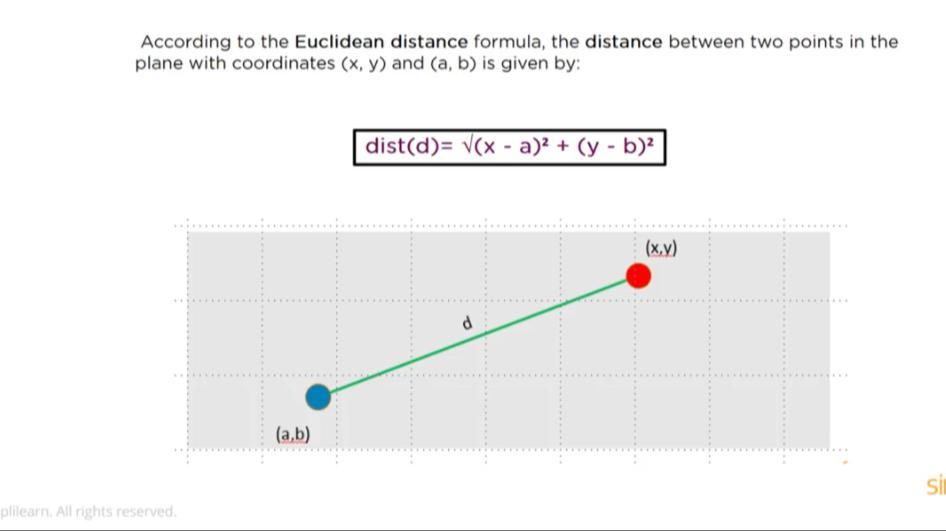

# Fitting K-NN to the Training set

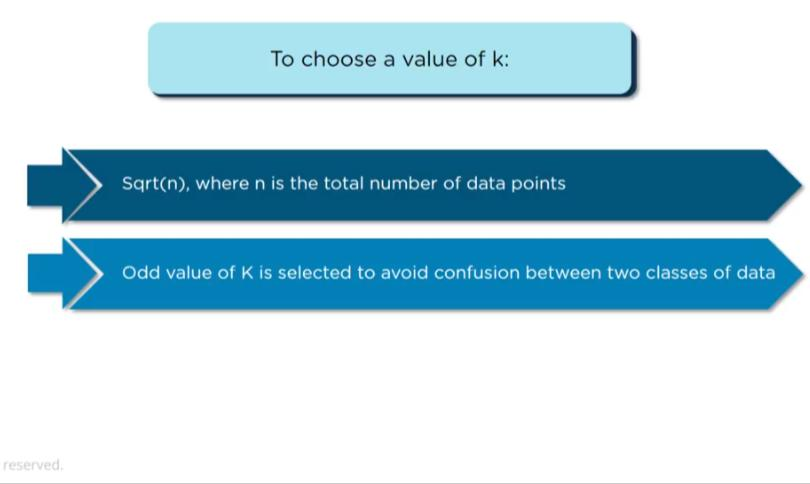

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p =2) #p=2 implies Euclidean Distance 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

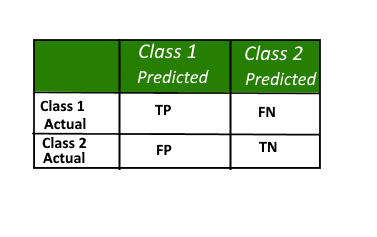

•True Positive (TP) : Observation is positive, and is predicted to be positive.
• False Negative (FN) : Observation is positive, but is predicted negative.
• True Negative (TN) : Observation is negative, and is predicted to be negative.
• False Positive (FP) : Observation is negative, but is predicted positive.

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[106,   2],
       [  4,  59]], dtype=int64)

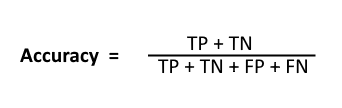

In [20]:
classifier.score(X_test, y_test) 

0.9649122807017544

# Cross Validation
##### (To avoid Overfitting and Underfitting)

In [21]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2):        #range(start,stop,interval)
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 

In [22]:
(cv_scores) 

[0.9394736842105263,
 0.9571052631578946,
 0.9621052631578946,
 0.9572368421052632,
 0.9569736842105263,
 0.9569736842105263,
 0.9544736842105264,
 0.9569736842105263,
 0.9519736842105264,
 0.9519736842105264,
 0.9544736842105263,
 0.9519736842105264,
 0.9546052631578947,
 0.9494736842105264,
 0.9494736842105264,
 0.9494736842105264,
 0.9469736842105263,
 0.9494736842105264,
 0.9494736842105264,
 0.9494736842105264,
 0.9469736842105263,
 0.9469736842105263,
 0.9469736842105263,
 0.9469736842105263,
 0.9419736842105264]

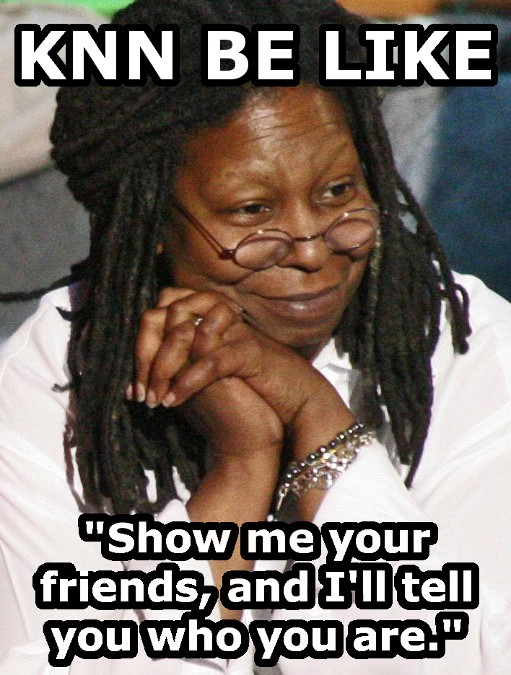